In [3]:
import numpy as np
import json
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [26]:
f=open("xList.txt")
xList=[]
for line in f.readlines():
    xList.append(json.loads(line))
    for i in range(60):
        xList[-1][i][4]=xList[-1][i][4]/100000000.0
f.close()
X = np.array(xList).reshape(len(xList), -1)

# read yList
f=open("yList.txt")
yList=[]
for line in f.readlines():
    yList.append(json.loads(line))
f.close()
y = np.array(yList).reshape(len(yList))

In [27]:
X.shape, y.shape

((14214, 300), (14214,))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
X_train.shape, X_test.shape

((11371, 300), (2843, 300))

In [30]:
y_train.shape, y_test.shape

((11371,), (2843,))

In [31]:
from sklearn.svm import SVC

clf = SVC(C=1.0, kernel='rbf', gamma=0.1, degree=2)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}, test score: {1}'.format(train_score, test_score))

train score: 0.840735203588075, test score: 0.5979599015124868


In [35]:
import sys
sys.path.append('..')
from common.utils import plot_param_curve
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

<module 'matplotlib.pyplot' from '/Users/wansizhe/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

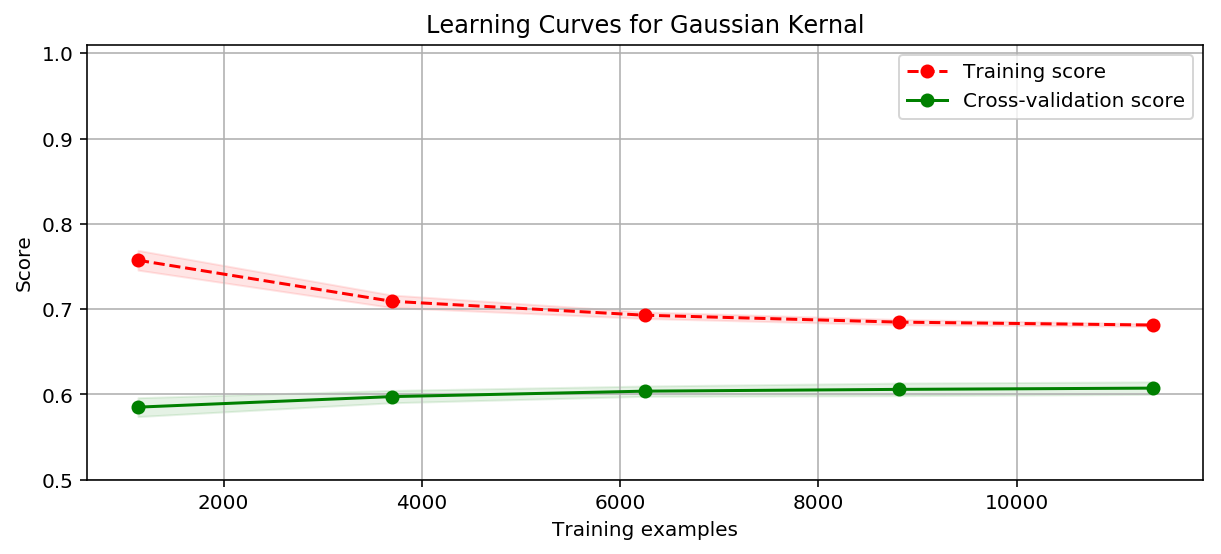

In [36]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'Learning Curves for Gaussian Kernal'
plt.figure(figsize=(10, 4), dpi=144)
plot_learning_curve(plt, SVC(C=1.0, kernel='rbf', gamma=0.01), title, X, y, ylim=(0.5, 1.01), cv=cv)

In [38]:
clf = SVC(C=1.0, kernel='poly', degree=2)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


train score: 0.6426875384750682; test score: 0.6109743228983469


/Users/wansizhe/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


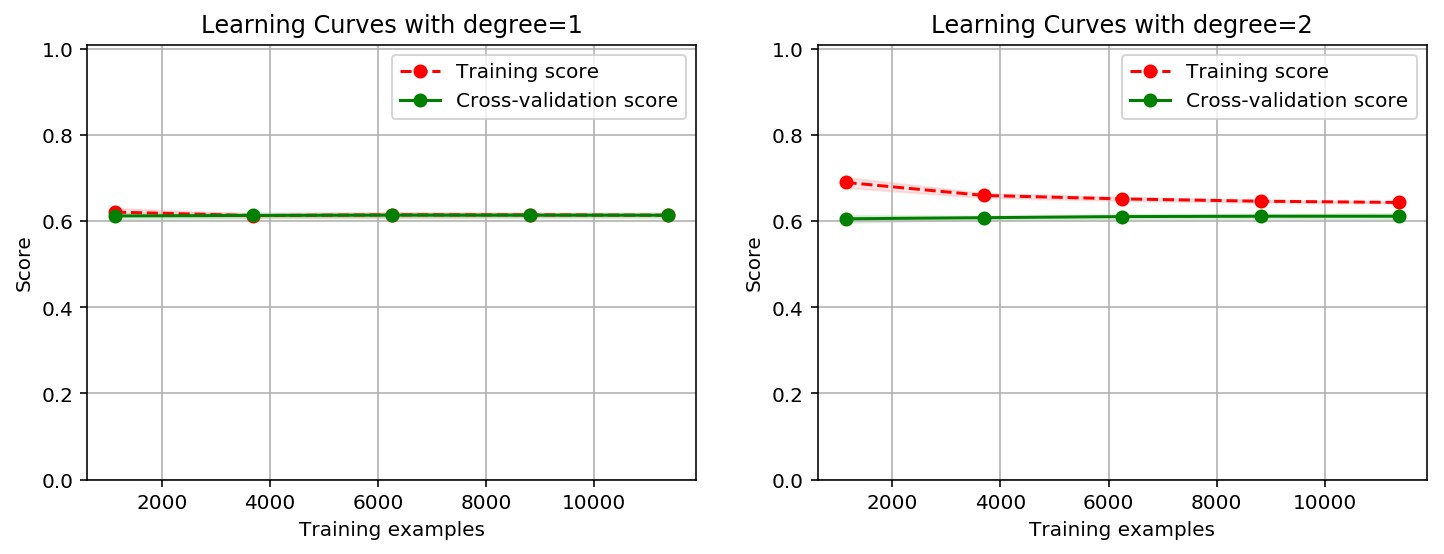

In [40]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = 'Learning Curves with degree={0}'
degrees = [1, 2]
plt.figure(figsize=(12, 4) ,dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i+1)
    plot_learning_curve(
        plt,
        SVC(C=1.0, kernel='poly', degree=degrees[i], gamma='auto'),
        title.format(degrees[i]),
        X, 
        y,
        ylim=(0, 1.01),
        cv=cv,
        n_jobs=4
    )